<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
df=pd.read_csv('boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


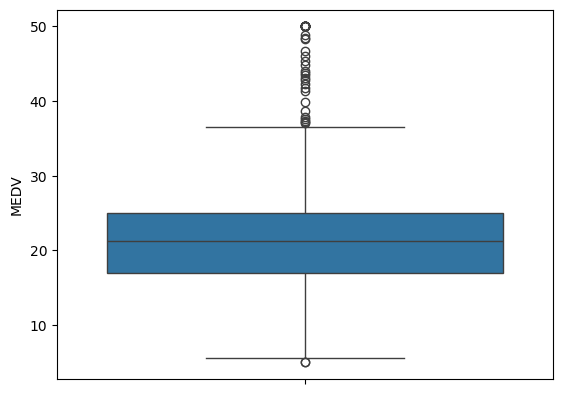

In [8]:
ax = sns.boxplot(df['MEDV'])
plt.show()

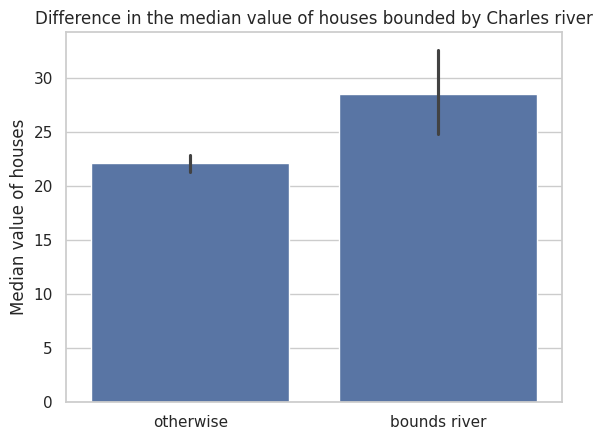

In [10]:
df.loc[(df['CHAS'] ==1), 'CHAS_bound'] = "bounds river"
df.loc[(df['CHAS'] ==0), 'CHAS_bound'] = "otherwise"

sns.set(style="whitegrid")
ax = sns.barplot(x='CHAS_bound', y='MEDV', data=df)
ax.set(xlabel='', ylabel='Median value of houses')
ax.set_title("Difference in the median value of houses bounded by Charles river")
plt.show()

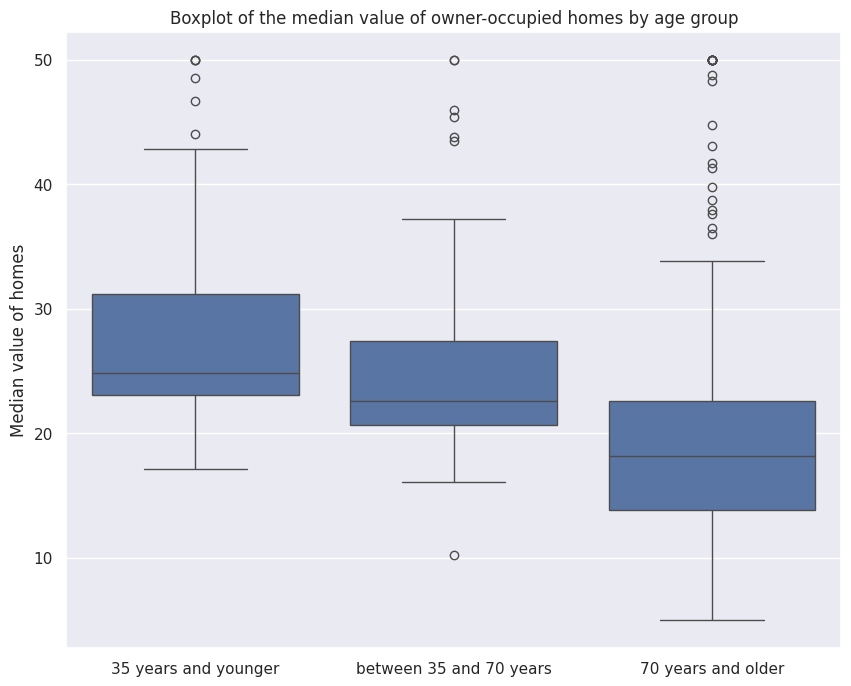

In [20]:
df.loc[(df['AGE'] <=35), 'age_group'] = "35 years and younger"
df.loc[(df['AGE'] >35) & (df['AGE']< 70), 'age_group'] = "between 35 and 70 years"
df.loc[(df['AGE'] >=70), 'age_group'] = "70 years and older"

col_order = ["35 years and younger",  "between 35 and 70 years", "70 years and older" ]

sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.boxplot(x='age_group', y='MEDV', data=df, order=col_order)
ax.set(xlabel='', ylabel='Median value of homes')
ax.set_title("Boxplot of the median value of owner-occupied homes by age group")
plt.show()

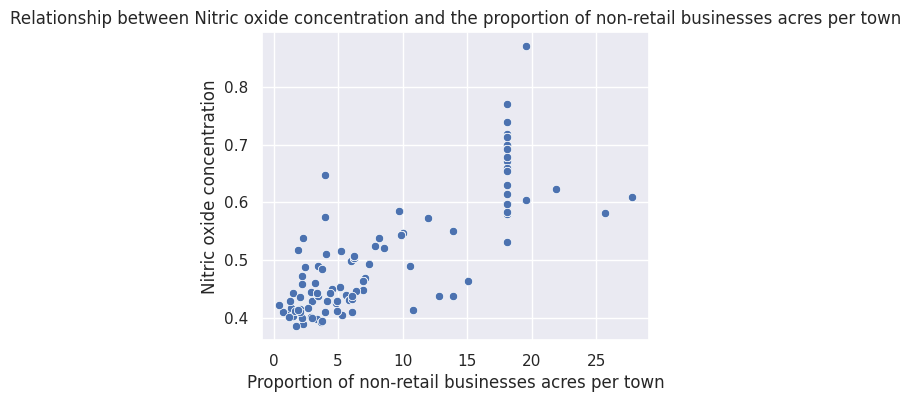

In [23]:
ax = sns.scatterplot(x='INDUS', y='NOX', data= df)

sns.set(rc = {'figure.figsize':(3,2)})
ax.set(xlabel='Proportion of non-retail businesses acres per town', 
      ylabel='Nitric oxide concentration')
ax.set_title("Relationship between Nitric oxide concentration and the proportion of non-retail businesses acres per town")
plt.show()

<ipython-input-24-9b188d01d68f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['PTRATIO'], kde=False)


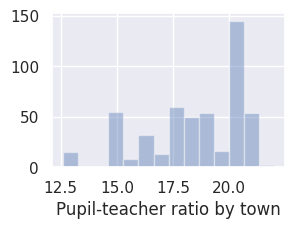

In [24]:
ax = sns.distplot(df['PTRATIO'], kde=False)
ax.set(xlabel='Pupil-teacher ratio by town')
plt.show()

In [25]:
# significant difference in median value of houses bounded by the Charles river - t-test
# H0: median for CHAS(0) = median for CHAS(1)
# H_alternative: CHAS(0) != median for CHAS(1) 

scipy.stats.ttest_ind(df[df['CHAS'] ==1]['MEDV'], 
                      df[df['CHAS'] ==0]['MEDV'], 
                      equal_var=True)

# Conclusion: p-value < 0.05, therefore reject the null hypothesis -> there is a significant difference in medina value of
# the shouses bounded by the Charles river

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [26]:
# is there a difference in median value of houses (MEDV) for each proportion of owner occupied built prior to 1940 (AGE) - ANOVA
# H0: no difference in MEDV by age group
# H_alternative: difference by age group

thirtyfive_lower = df[df['age_group'] == "35 years and younger"]['MEDV']
thirtyfive_seventy = df[df['age_group'] == "between 35 and 70 years"]['MEDV']
seventy_older =  df[df['age_group'] == "70 years and older"]['MEDV'] 

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value:{1}".format(f_statistic, p_value))

# Conclusion: p-value < 0.05, reject the null hypothesis -> there is a significant difference in the median prices of home by 
# age group

F_Statistic: 36.40764999196599, P-Value:1.7105011022702984e-15


In [27]:
# is there no relationship between Nitric oxide concentration and proportion of non-retail business acres per town - Pearson
# H0: no relationship betwen Nitric oxide concentration and proportion of non-retail business acres per town
# H_alternative: no relationship between two variables

scipy.stats.pearsonr(df['NOX'], df['INDUS'])

# Conclusion: p-value < 0.05 -> the two variable are strongly correlated (postive correlation)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [28]:
# impact of an additional weighted distance to the five Boston employment centres (DIS) 
# on the median value of owner occupied homes (MEDV) - regression
# H0: no relationship between DIS and MEDV
# H_alternative: relationship between the two

X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X) # add an intercept
            
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# Conclusion: p-value < 0.05 -> strong correlation between MEDV and DIS
# postively correlated which means the more distant from Boston, the higher the medin home prices

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        17:48:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""